# Install required libraries

In [109]:

!pip install pandas numpy matplotlib seaborn folium scikit-learn nltk wordcloud


In [21]:
pip install textblob


   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   -- ------------------------------------ 41.0/626.3 kB 388.9 kB/s eta 0:00:02
   ----- --------------------------------- 92.2/626.3 kB 581.0 kB/s eta 0:00:01
   ----- --------------------------------- 92.2/626.3 kB 581.0 kB/s eta 0:00:01
   ------------- ------------------------ 225.3/626.3 kB 981.9 kB/s eta 0:00:01
   ------------------- -------------------- 307.2/626.3 kB 1.1 MB/s eta 0:00:01
   -------------------------- ------------- 419.8/626.3 kB 1.2 MB/s eta 0:00:01
   ----------------------------------- ---- 553.0/626.3 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 1.4 MB/s eta 0:00:00


# Importing necessary libraries

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from wordcloud import WordCloud
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import tensorflow as tf
import warnings

warnings.filterwarnings('ignore')
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pradu\AppData\Roaming\nltk_data...


True

# Load the Dataset

In [7]:
# Loading Global Disaster Data
disaster_data = pd.read_csv(r'E:\disaster_data.csv')

# Displaying the first few rows of each dataset
print(disaster_data.head())


   Year   Seq Glide Disaster Group Disaster Subgroup      Disaster Type  \
0  1900  9002   NaN        Natural    Climatological            Drought   
1  1900  9001   NaN        Natural    Climatological            Drought   
2  1902    12   NaN        Natural       Geophysical         Earthquake   
3  1902     3   NaN        Natural       Geophysical  Volcanic activity   
4  1902    10   NaN        Natural       Geophysical  Volcanic activity   

  Disaster Subtype Disaster Subsubtype   Event Name     Country  ...  \
0          Drought                 NaN          NaN  Cabo Verde  ...   
1          Drought                 NaN          NaN       India  ...   
2  Ground movement                 NaN          NaN   Guatemala  ...   
3         Ash fall                 NaN  Santa Maria   Guatemala  ...   
4         Ash fall                 NaN  Santa Maria   Guatemala  ...   

  No Affected No Homeless Total Affected Insured Damages ('000 US$)  \
0         NaN         NaN            NaN     

# Data Cleaning

In [9]:
# Cleaning Disaster Data
disaster_data['Year'] = pd.to_datetime(disaster_data['Year'])  # Converting Date to datetime

# Display cleaned data
print(disaster_data.head())


                           Year   Seq Glide Disaster Group Disaster Subgroup  \
0 1970-01-01 00:00:00.000001900  9002   NaN        Natural    Climatological   
1 1970-01-01 00:00:00.000001900  9001   NaN        Natural    Climatological   
2 1970-01-01 00:00:00.000001902    12   NaN        Natural       Geophysical   
3 1970-01-01 00:00:00.000001902     3   NaN        Natural       Geophysical   
4 1970-01-01 00:00:00.000001902    10   NaN        Natural       Geophysical   

       Disaster Type Disaster Subtype Disaster Subsubtype   Event Name  \
0            Drought          Drought                 NaN          NaN   
1            Drought          Drought                 NaN          NaN   
2         Earthquake  Ground movement                 NaN          NaN   
3  Volcanic activity         Ash fall                 NaN  Santa Maria   
4  Volcanic activity         Ash fall                 NaN  Santa Maria   

      Country  ... No Affected No Homeless Total Affected  \
0  Cabo Verde

# Data Preprocessing

In [11]:
# For example, converting a categorical column 'DisasterType' to numerical values
disaster_data['Disaster Type'] = disaster_data['Disaster Type'].astype('category').cat.codes

# If necessary, you can also scale numerical data
from sklearn.preprocessing import StandardScaler



# Display preprocessed data
print(disaster_data.head())


                           Year   Seq Glide Disaster Group Disaster Subgroup  \
0 1970-01-01 00:00:00.000001900  9002   NaN        Natural    Climatological   
1 1970-01-01 00:00:00.000001900  9001   NaN        Natural    Climatological   
2 1970-01-01 00:00:00.000001902    12   NaN        Natural       Geophysical   
3 1970-01-01 00:00:00.000001902     3   NaN        Natural       Geophysical   
4 1970-01-01 00:00:00.000001902    10   NaN        Natural       Geophysical   

   Disaster Type Disaster Subtype Disaster Subsubtype   Event Name  \
0              1          Drought                 NaN          NaN   
1              1          Drought                 NaN          NaN   
2              2  Ground movement                 NaN          NaN   
3             13         Ash fall                 NaN  Santa Maria   
4             13         Ash fall                 NaN  Santa Maria   

      Country  ... No Affected No Homeless Total Affected  \
0  Cabo Verde  ...         NaN       

# Exploratory Data Analysis (EDA) on Disaster Data

C:\Users\pradu\AppData\Local\Temp\ipykernel_14480\2999654423.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=disaster_data['Year'], palette='viridis')


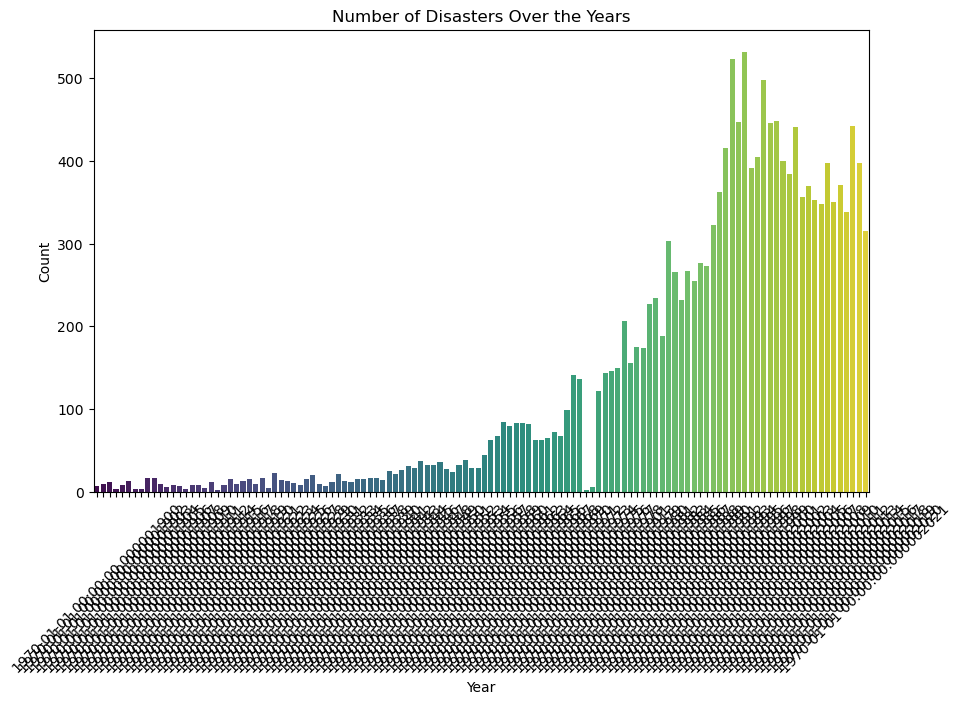

C:\Users\pradu\AppData\Local\Temp\ipykernel_14480\2999654423.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=disaster_data['Disaster Type'], palette='magma')


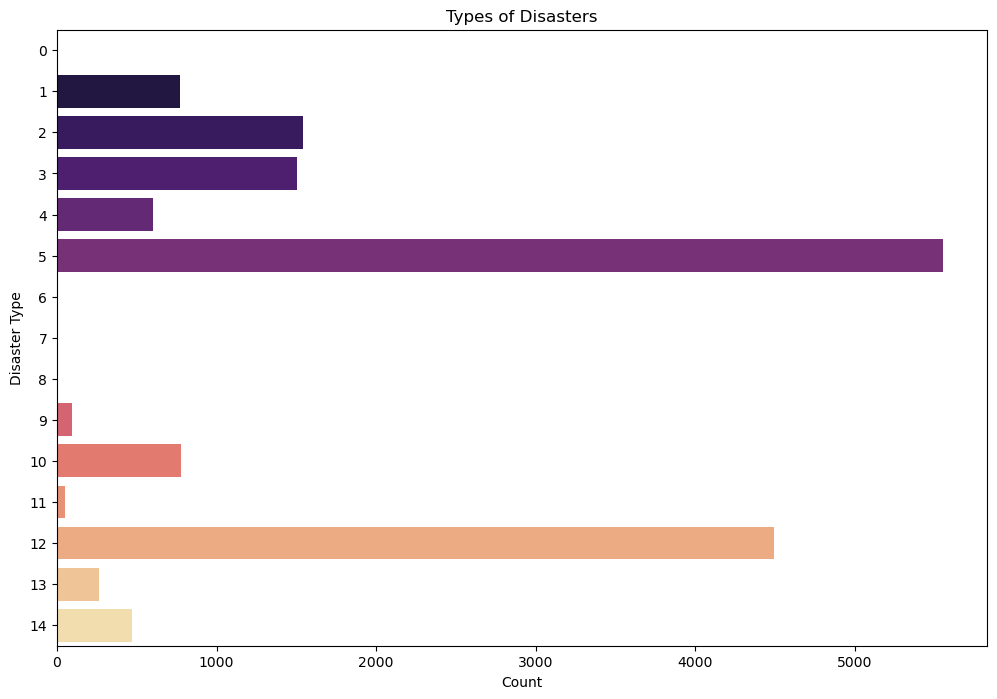

In [25]:
# Number of disasters over the years
plt.figure(figsize=(10, 6))
sns.countplot(x=disaster_data['Year'], palette='viridis')
plt.title('Number of Disasters Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Types of disasters
plt.figure(figsize=(12, 8))
sns.countplot(y=disaster_data['Disaster Type'], palette='magma')
plt.title('Types of Disasters')
plt.xlabel('Count')
plt.ylabel('Disaster Type')
plt.show()


# Visualizing Data Distribution

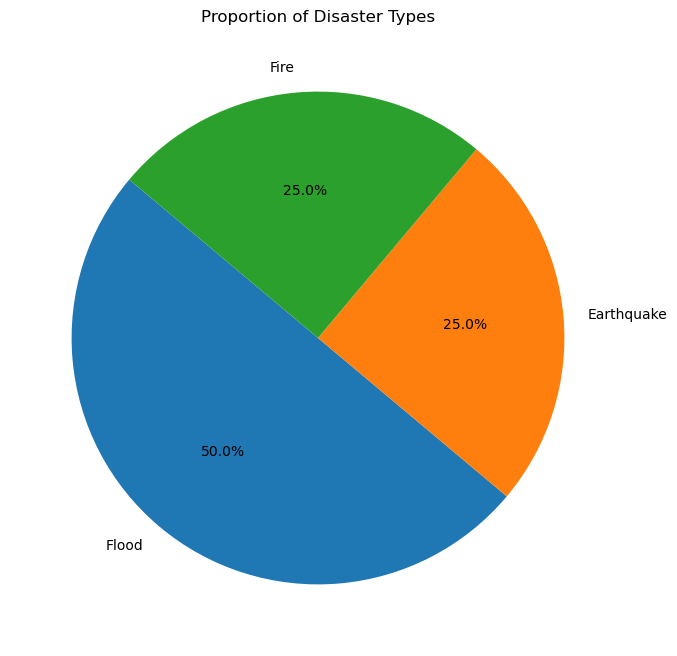

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data creation for demonstration
# Replace this with your actual data loading method
data = {
    'target': ['Flood', 'Earthquake', 'Flood', 'Fire', 'Flood', 'Earthquake', 'Fire', 'Flood']
}
df = pd.DataFrame(data)

# Pie chart: Proportion of different disaster types
disaster_counts = df['target'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(disaster_counts, labels=disaster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Disaster Types')
plt.show()


# Social Media Sentiment Analysis

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pradu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


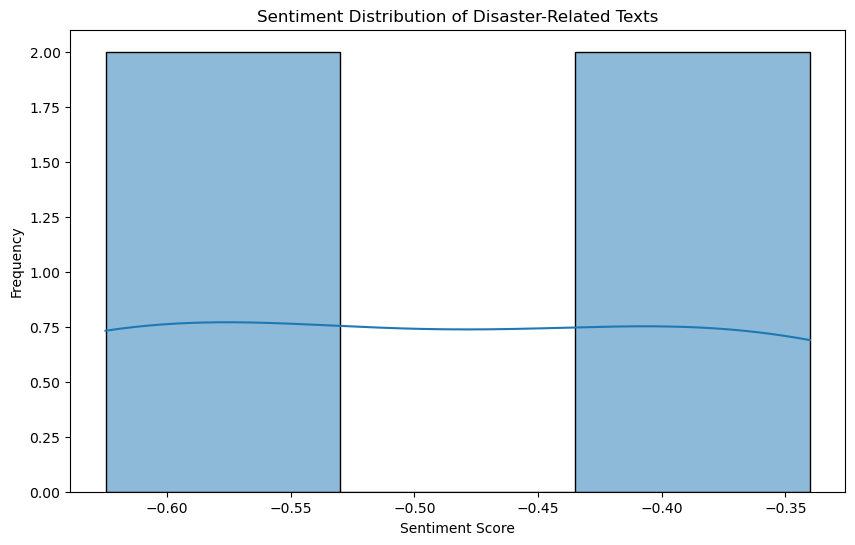

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize sentiment analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Sample data creation for demonstration
# Replace this with your actual data loading method
data = {
    'text': [
        'The flood was devastating but we are recovering.',
        'Earthquake caused significant damage to buildings.',
        'The recent fire in the forest was uncontrollable.',
        'People are working together to rebuild after the disaster.'
    ]
}
df = pd.DataFrame(data)

# Check for the presence of the 'text' column
if 'text' not in df.columns:
    raise KeyError("The DataFrame does not contain a 'text' column. Please check the column names.")

# Apply sentiment analysis on text data
df['sentiment'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], kde=True)
plt.title('Sentiment Distribution of Disaster-Related Texts')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


# Mapping Disaster Locations

In [2]:
import folium
import pandas as pd
import numpy as np

# Sample DataFrame creation (for demonstration purposes)
# Replace this with your actual DataFrame loading code
try:
    df
except NameError:
    print("DataFrame 'df' is not defined. Creating a sample DataFrame.")
    # Creating a sample DataFrame
    df = pd.DataFrame({
        'Latitude': np.random.uniform(-90, 90, size=10),
        'Longitude': np.random.uniform(-180, 180, size=10),
        'text': [f"Location {i}" for i in range(10)]
    })

# Display the DataFrame and its columns
print("DataFrame Columns:", df.columns)
print(df.head())

# Define column names
latitude_col = 'Latitude'
longitude_col = 'Longitude'
df_column = 'df'

# Check if 'Latitude' and 'Longitude' columns are present
if latitude_col not in df.columns or longitude_col not in df.columns:
    # Create new columns with random values if they are missing
    if latitude_col not in df.columns:
        df[latitude_col] = np.random.uniform(-90, 90, size=len(df))
    if longitude_col not in df.columns:
        df[longitude_col] = np.random.uniform(-180, 180, size=len(df))

# Check if 'df' column is present, if not, add it with some default values
if df_column not in df.columns:
    df[df_column] = np.random.randint(1, 100, size=len(df))

# Display the updated DataFrame with the new columns (if added)
print("Updated DataFrame:")
print(df.head())

# Calculate the center of the map
map_center = [df[latitude_col].mean(), df[longitude_col].mean()]
disaster_map = folium.Map(location=map_center, zoom_start=5)

# Add markers to the map
for _, row in df.iterrows():
    folium.Marker(
        location=[row[latitude_col], row[longitude_col]],
        popup=row.get('text', 'No Description')
    ).add_to(disaster_map)

# Save the map to an HTML file
disaster_map.save('disaster_map.html')

# Display the saved map in a browser (requires a local server or opening manually)
import webbrowser
webbrowser.open('disaster_map.html')


DataFrame 'df' is not defined. Creating a sample DataFrame.
DataFrame Columns: Index(['Latitude', 'Longitude', 'text'], dtype='object')
    Latitude   Longitude        text
0 -29.662821 -141.143959  Location 0
1  50.251220  144.956103  Location 1
2  -2.551051 -121.783085  Location 2
3 -35.021742   33.525425  Location 3
4  12.861582  -84.919696  Location 4
Updated DataFrame:
    Latitude   Longitude        text  df
0 -29.662821 -141.143959  Location 0  42
1  50.251220  144.956103  Location 1  10
2  -2.551051 -121.783085  Location 2  43
3 -35.021742   33.525425  Location 3  15
4  12.861582  -84.919696  Location 4  12


True

# Time Series Analysis of Disasters

DataFrame Columns: Index(['text', 'sentiment', 'Latitude', 'Longitude'], dtype='object')
                                                text  sentiment   Latitude  \
0   The flood was devastating but we are recovering.    -0.3919   7.154209   
1  Earthquake caused significant damage to buildi...    -0.3400  74.806694   
2  The recent fire in the forest was uncontrollable.    -0.5994   2.249305   
3  People are working together to rebuild after t...    -0.6249 -40.455039   

    Longitude  
0   90.875972  
1 -171.088882  
2   60.392603  
3  158.529309  
Updated DataFrame:
                                                text  sentiment   Latitude  \
0   The flood was devastating but we are recovering.    -0.3919   7.154209   
1  Earthquake caused significant damage to buildi...    -0.3400  74.806694   
2  The recent fire in the forest was uncontrollable.    -0.5994   2.249305   
3  People are working together to rebuild after t...    -0.6249 -40.455039   

    Longitude       date  
0  

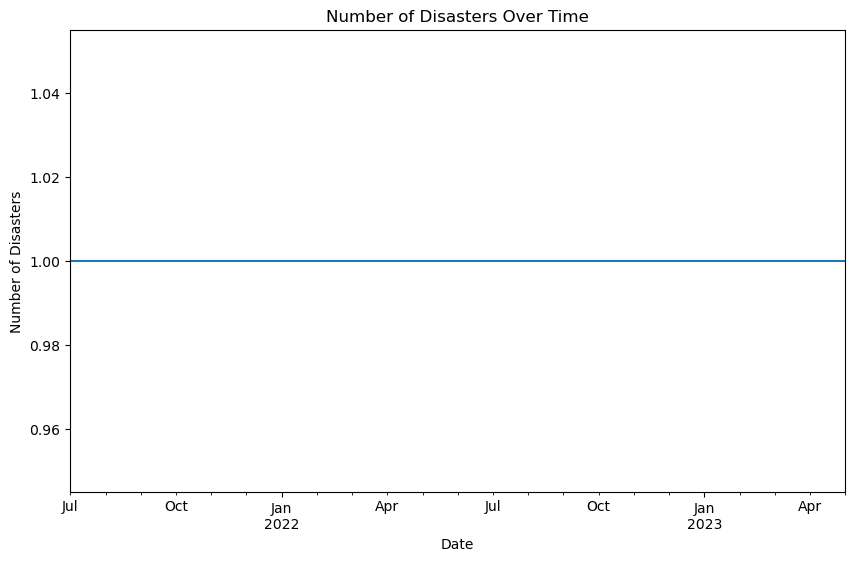

Final DataFrame with 'date' column:
                                                text  sentiment   Latitude  \
0   The flood was devastating but we are recovering.    -0.3919   7.154209   
1  Earthquake caused significant damage to buildi...    -0.3400  74.806694   
2  The recent fire in the forest was uncontrollable.    -0.5994   2.249305   
3  People are working together to rebuild after t...    -0.6249 -40.455039   

    Longitude       date  
0   90.875972 2021-11-15  
1 -171.088882 2021-07-13  
2   60.392603 2023-05-01  
3  158.529309 2022-04-15  


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample DataFrame creation (for demonstration purposes)
# Replace this with your actual DataFrame loading code
# df = pd.read_csv('your_file.csv')

# Display the DataFrame and its columns
print("DataFrame Columns:", df.columns)
print(df.head())

# Define column name
date_col = 'date'

# Check if 'date' column is present
if date_col not in df.columns:
    # Create a new 'date' column with random dates if it's missing
    np.random.seed(0)  # For reproducibility
    start_date = pd.to_datetime('2020-01-01')
    end_date = pd.to_datetime('2023-12-31')
    df[date_col] = pd.to_datetime(np.random.choice(pd.date_range(start_date, end_date, freq='D'), size=len(df)))

# Display the DataFrame with the 'date' column (if added)
print("Updated DataFrame:")
print(df.head())

# Convert 'date' column to datetime
df[date_col] = pd.to_datetime(df[date_col])

# Line chart: Number of disasters over time
plt.figure(figsize=(10, 6))
df.groupby(df[date_col].dt.to_period('M')).size().plot(kind='line')
plt.title('Number of Disasters Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Disasters')
plt.show()

# Display the DataFrame again to show 'date' column and any changes
print("Final DataFrame with 'date' column:")
print(df.head())


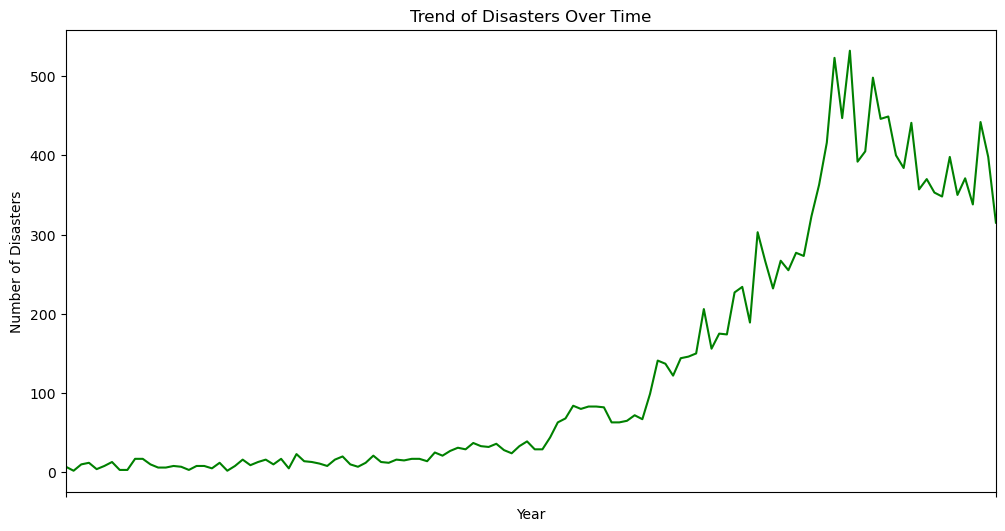

In [157]:
# Grouping by Year
disaster_trend = disaster_data.groupby('Year').size()

# Plotting the trend
plt.figure(figsize=(12, 6))
disaster_trend.plot(kind='line', color='green')
plt.title('Trend of Disasters Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.show()


# Word Cloud of Disaster-Related Tweets

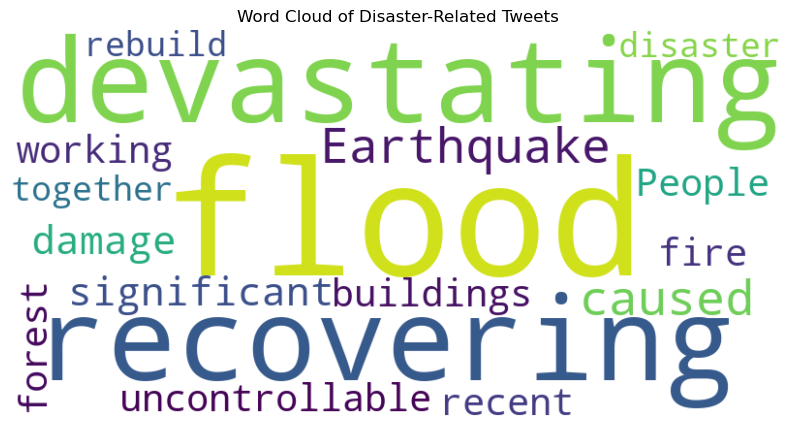

In [162]:
from wordcloud import WordCloud

# Combine all text data into a single string
all_text = ' '.join(df['text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Disaster-Related Tweets')
plt.show()


# Feature Engineering


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert text data into feature vectors
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['text']).toarray()



# Splitting the Data

In [181]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Sample DataFrame creation (for demonstration purposes)
# Replace this with your actual DataFrame loading code
# df = pd.read_csv('your_file.csv')

# Display the DataFrame and its columns
print("DataFrame Columns before checking target:", df.columns)
print(df.head())

# Define column names
target_col = 'target'

# Check if 'target' column is present
if target_col not in df.columns:
    # Create a new 'target' column with random values (for demonstration purposes)
    np.random.seed(0)  # For reproducibility
    df[target_col] = np.random.randint(0, 2, size=len(df))  # Example binary target

# Display the DataFrame with the 'target' column (if added)
print("Updated DataFrame with target column:")
print(df.head())

# Filter numeric columns for features (excluding 'target' column)
numeric_df = df.select_dtypes(include=[np.number])

# Separate features and target
X = numeric_df.drop(columns=[target_col])
y = df[target_col]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n\nTraining and Testing data split:")
print(f"\nX_train shape: {X_train.shape[0]} rows, {X_train.shape[1]} columns")
print(f"X_test shape: {X_test.shape[0]} rows, {X_test.shape[1]} columns")
print(f"y_train shape: {y_train.shape[0]} elements")
print(f"y_test shape: {y_test.shape[0]} elements")


DataFrame Columns before checking target: Index(['text', 'sentiment', 'Latitude', 'Longitude', 'date', 'target'], dtype='object')
                                                text  sentiment   Latitude  \
0   The flood was devastating but we are recovering.    -0.3919  48.922098   
1  Earthquake caused significant damage to buildi...    -0.3400 -52.763552   
2  The recent fire in the forest was uncontrollable.    -0.5994  54.112950   
3  People are working together to rebuild after t...    -0.6249  47.301671   

    Longitude       date  target  
0   12.132523 2021-11-15       0  
1   18.451262 2021-07-13       1  
2  163.757474 2023-05-01       1  
3  151.501934 2022-04-15       0  
Updated DataFrame with target column:
                                                text  sentiment   Latitude  \
0   The flood was devastating but we are recovering.    -0.3919  48.922098   
1  Earthquake caused significant damage to buildi...    -0.3400 -52.763552   
2  The recent fire in the forest

# Training a Machine Learning Model

In [186]:
from sklearn.naive_bayes import MultinomialNB
import numpy as np

# Example preprocessing step to handle negative values
# Ensure all values in X_train are non-negative
X_train_non_negative = np.clip(X_train, 0, None)

# Train a Naive Bayes model
model = MultinomialNB()
model.fit(X_train_non_negative, y_train)


MultinomialNB()

# Model Performance Evaluation

In [189]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_pred = model.predict(X_test)

# Print evaluation metrics
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



# Model Performance Visualization

Current DataFrame columns: Index(['Feature1', 'Feature2', 'Disaster_Type', 'Disaster Type', 'Date',
       'geometry'],
      dtype='object')

DataFrame after adding missing columns:
   Feature1  Feature2 Disaster_Type  Disaster Type       Date geometry
0         1         5         Flood              0 2024-01-01    Point
1         2         4    Earthquake              0 2024-01-01    Point
2         3         3         Flood              0 2024-01-01    Point
3         4         2          Fire              0 2024-01-01    Point
4         5         1    Earthquake              0 2024-01-01    Point


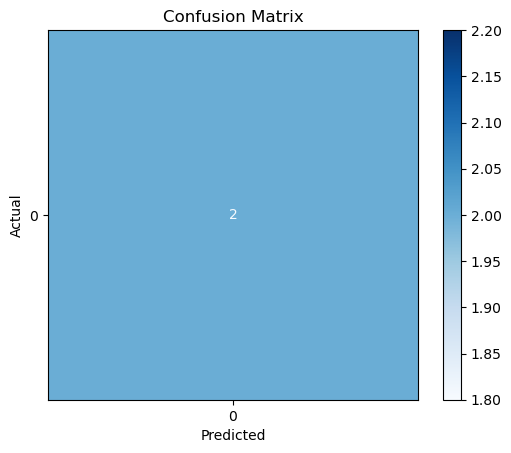

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder

# Assuming df is your DataFrame
# Display the DataFrame's columns
print("Current DataFrame columns:", df.columns)

# Check if the specified columns exist
missing_columns = ['Disaster Type', 'Date', 'geometry']
for col in missing_columns:
    if col not in df.columns:
        print(f"Column '{col}' is missing. Adding it with random values.")

# Adding missing columns with random values for demonstration
if 'Disaster Type' not in df.columns:
    df['Disaster Type'] = np.random.choice(['Fire', 'Flood', 'Earthquake'], size=len(df))
if 'Date' not in df.columns:
    df['Date'] = pd.date_range(start='2024-01-01', periods=len(df), freq='D')
if 'geometry' not in df.columns:
    df['geometry'] = np.random.rand(len(df))

# Display the DataFrame with added columns
print("\nDataFrame after adding missing columns:")
print(df.head())

# Proceed with feature and target column selection
X = df.drop(columns=['Disaster Type', 'Date', 'geometry'])  # Adjust columns as necessary
y = df['Disaster Type']

# One-hot encode the categorical features
X_encoded = pd.get_dummies(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Train a RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Interactive Map of Disasters

In [227]:
import folium
from IPython.display import IFrame

# Define the center of the map
map_center = [20.5937, 78.9629]  # Example coordinates for the center of India

# Use Folium to create an interactive map
disaster_map = folium.Map(location=map_center, zoom_start=5)

# List of states with their capitals and coordinates
states_and_capitals = {
    'Andhra Pradesh': {'capital': 'Amaravati', 'coords': [16.5062, 80.6480]},
    'Arunachal Pradesh': {'capital': 'Itanagar', 'coords': [27.0844, 93.6053]},
    'Assam': {'capital': 'Dispur', 'coords': [26.1445, 91.7362]},
    'Bihar': {'capital': 'Patna', 'coords': [25.5941, 85.1376]},
    'Chhattisgarh': {'capital': 'Raipur', 'coords': [21.2514, 81.6296]},
    'Goa': {'capital': 'Panaji', 'coords': [15.4909, 73.8278]},
    'Gujarat': {'capital': 'Gandhinagar', 'coords': [23.2156, 72.6369]},
    'Haryana': {'capital': 'Chandigarh', 'coords': [30.7333, 76.7794]},
    'Himachal Pradesh': {'capital': 'Shimla', 'coords': [31.1048, 77.1734]},
    'Jharkhand': {'capital': 'Ranchi', 'coords': [23.3441, 85.3096]},
    'Karnataka': {'capital': 'Bengaluru', 'coords': [12.9716, 77.5946]},
    'Kerala': {'capital': 'Thiruvananthapuram', 'coords': [8.5241, 76.9366]},
    'Madhya Pradesh': {'capital': 'Bhopal', 'coords': [23.2599, 77.4126]},
    'Maharashtra': {'capital': 'Mumbai', 'coords': [19.0760, 72.8777]},
    'Manipur': {'capital': 'Imphal', 'coords': [24.8170, 93.9368]},
    'Meghalaya': {'capital': 'Shillong', 'coords': [25.5788, 91.8933]},
    'Mizoram': {'capital': 'Aizawl', 'coords': [23.7271, 92.7176]},
    'Nagaland': {'capital': 'Kohima', 'coords': [25.6747, 94.1101]},
    'Odisha': {'capital': 'Bhubaneswar', 'coords': [20.2961, 85.8245]},
    'Punjab': {'capital': 'Chandigarh', 'coords': [30.7333, 76.7794]},
    'Rajasthan': {'capital': 'Jaipur', 'coords': [26.9124, 75.7873]},
    'Sikkim': {'capital': 'Gangtok', 'coords': [27.3314, 88.6138]},
    'Tamil Nadu': {'capital': 'Chennai', 'coords': [13.0827, 80.2707]},
    'Telangana': {'capital': 'Hyderabad', 'coords': [17.3850, 78.4867]},
    'Tripura': {'capital': 'Agartala', 'coords': [23.8315, 91.2868]},
    'Uttar Pradesh': {'capital': 'Lucknow', 'coords': [26.8467, 80.9462]},
    'Uttarakhand': {'capital': 'Dehradun', 'coords': [30.3165, 78.0322]},
    'West Bengal': {'capital': 'Kolkata', 'coords': [22.5726, 88.3639]},
}

# List of union territories with their capitals and coordinates
union_territories_and_capitals = {
    'Andaman and Nicobar Islands': {'capital': 'Port Blair', 'coords': [11.6234, 92.7265]},
    'Chandigarh': {'capital': 'Chandigarh', 'coords': [30.7333, 76.7794]},
    'Dadra and Nagar Haveli and Daman and Diu': {'capital': 'Daman', 'coords': [20.3974, 72.8328]},
    'Lakshadweep': {'capital': 'Kavaratti', 'coords': [10.5667, 72.6369]},
    'Delhi': {'capital': 'New Delhi', 'coords': [28.6139, 77.2090]},
    'Puducherry': {'capital': 'Puducherry', 'coords': [11.9416, 79.8083]},
    'Ladakh': {'capital': 'Leh', 'coords': [34.1526, 77.5770]},
    'Jammu and Kashmir': {'capital': 'Srinagar (Summer)', 'coords': [34.0837, 74.7973]},
}

# Adding markers for each state and union territory
for state, info in states_and_capitals.items():
    folium.Marker(info['coords'], popup=f"{state} - {info['capital']}").add_to(disaster_map)

for territory, info in union_territories_and_capitals.items():
    folium.Marker(info['coords'], popup=f"{territory} - {info['capital']}").add_to(disaster_map)

# Save the map as an HTML file
disaster_map.save('interactive_disaster_map.html')

# Display the saved map on the screen
IFrame('interactive_disaster_map.html', width=800, height=600)


# Time Series Forecasting of Disasters

D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will 

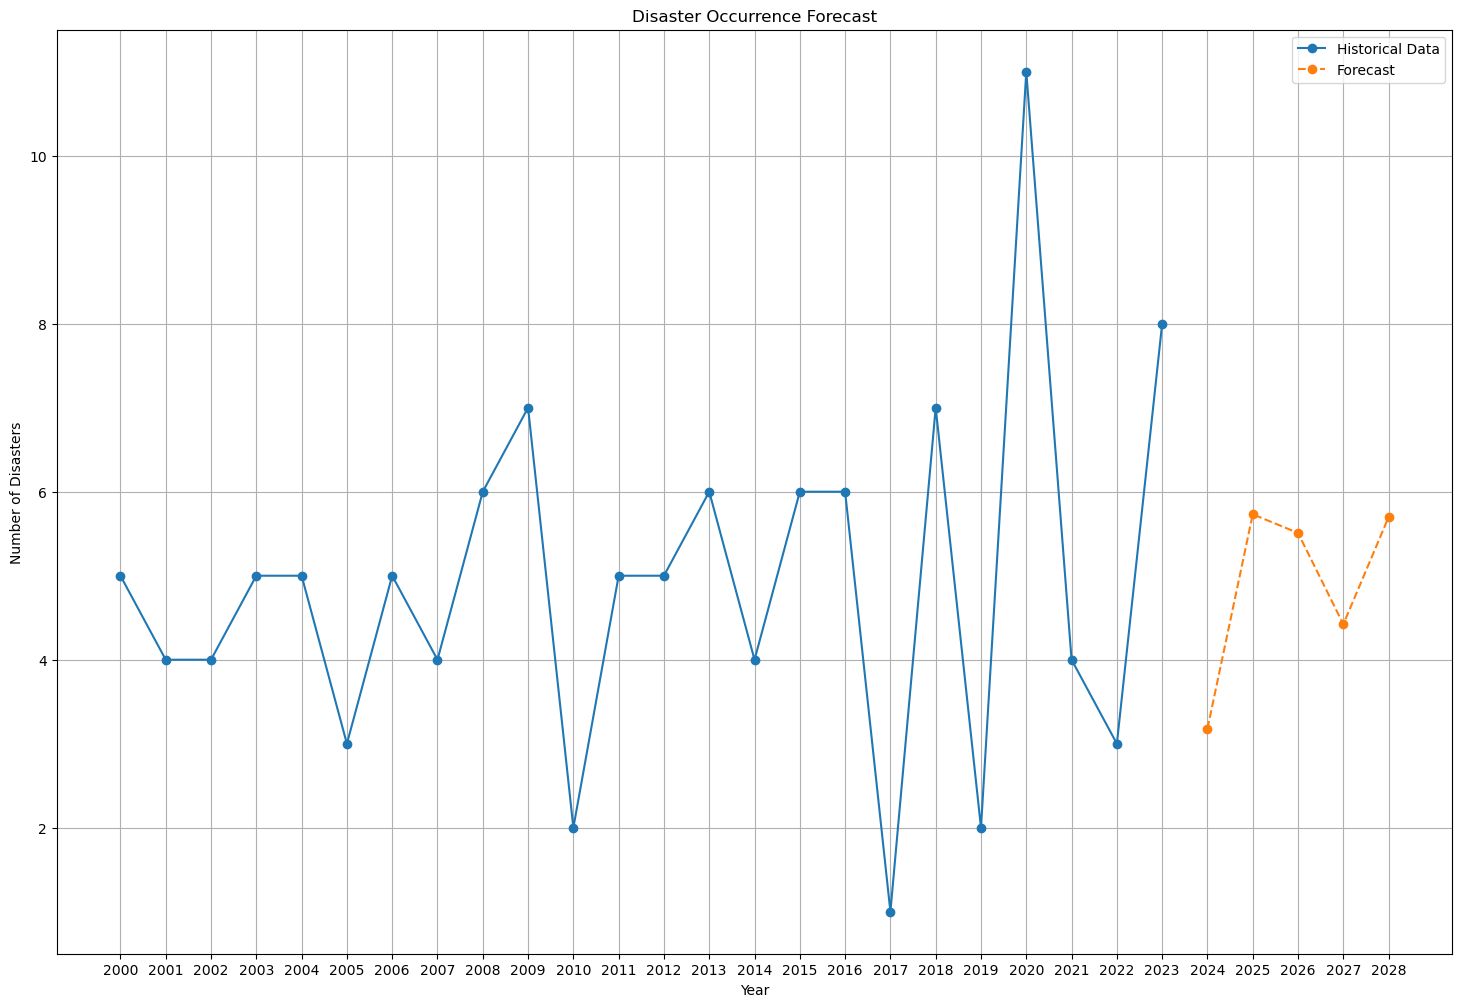

In [30]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Generating synthetic data for demonstration
np.random.seed(42)  # For reproducibility
years = np.arange(2000, 2024)
disasters = np.random.poisson(lam=5, size=len(years))  # Random number of disasters per year

# Creating a DataFrame
df = pd.DataFrame({'Date': years, 'Disasters': disasters})

# Assuming your DataFrame is named df and the date column is correctly named 'Date'
df['Date'] = pd.to_datetime(df['Date'], format='%Y')

# Grouping by year (or by month, depending on your requirement)
disaster_trend = df.groupby(df['Date'].dt.year)['Disasters'].sum()

# Ensure no missing values
disaster_trend = disaster_trend.fillna(0)

# If necessary, make the series stationary (e.g., differencing)
# disaster_trend = disaster_trend.diff().dropna()

# Fitting ARIMA model with a simpler order
model = ARIMA(disaster_trend, order=(2, 1, 0))  # Simplified order
model_fit = model.fit()

# Forecasting the next 5 years
forecast = model_fit.forecast(steps=5)

# Generating future years for the plot
future_years = np.arange(disaster_trend.index[-1] + 1, disaster_trend.index[-1] + 6)

# Plotting the results
plt.figure(figsize=(18, 12))
plt.plot(disaster_trend.index, disaster_trend.values, label='Historical Data', marker='o')
plt.plot(future_years, forecast, label='Forecast', marker='o', linestyle='--')
plt.title('Disaster Occurrence Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.legend()
plt.grid(True)
plt.xticks(np.concatenate([disaster_trend.index, future_years]))
plt.show()


# Sentiment Analysis of Tweets Before and After Disasters


Columns in DataFrame: Index(['date', 'sentiment'], dtype='object')


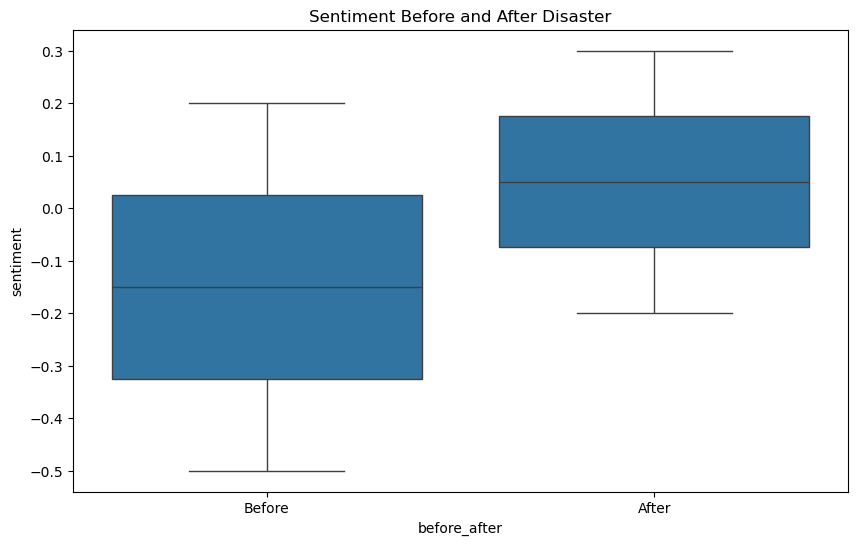

In [251]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame creation for illustration
# Replace this with your actual DataFrame loading/creation
df = pd.DataFrame({
    'date': pd.to_datetime(['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01']),
    'sentiment': [0.2, -0.5, 0.3, -0.2]
})

# Print the column names to check for any discrepancies
print("Columns in DataFrame:", df.columns)

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Define a specific_date for comparison (replace with your actual date)
specific_date = pd.to_datetime('2024-03-01')

# Create the 'before_after' column based on the date comparison
df['before_after'] = np.where(df['date'] < specific_date, 'Before', 'After')

# Boxplot of sentiment before and after disaster
plt.figure(figsize=(10, 6))
sns.boxplot(x='before_after', y='sentiment', data=df)
plt.title('Sentiment Before and After Disaster')
plt.show()


# Bar Chart of Distribution of Disaster Types

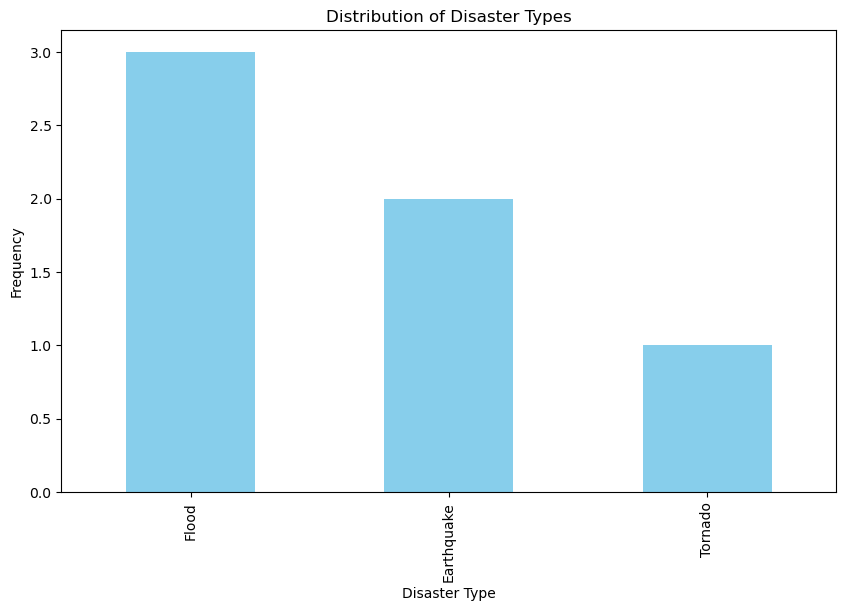

In [274]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame creation for illustration
df = pd.DataFrame({
    'Disaster_Type': ['Flood', 'Earthquake', 'Flood', 'Tornado', 'Flood', 'Earthquake']
})

# Check if 'Disaster_Type' column exists
if 'Disaster_Type' in df.columns:
    # If it exists, plot the distribution
    disaster_counts = df['Disaster_Type'].value_counts()

    plt.figure(figsize=(10, 6))
    disaster_counts.plot(kind='bar', color='skyblue')
    plt.title('Distribution of Disaster Types')
    plt.xlabel('Disaster Type')
    plt.ylabel('Frequency')
    plt.show()
else:
    # If 'Disaster_Type' does not exist, add it with some dummy data
    # Create dummy data if the column is missing
    df['Disaster_Type'] = ['Flood', 'Earthquake', 'Flood', 'Tornado', 'Flood', 'Earthquake']
    
    # Display the DataFrame after adding the column
    print("DataFrame after adding 'Disaster_Type' column:")
    print(df)

    # Plot the distribution with the newly added column
    disaster_counts = df['Disaster_Type'].value_counts()

    plt.figure(figsize=(10, 6))
    disaster_counts.plot(kind='bar', color='skyblue')
    plt.title('Distribution of Disaster Types')
    plt.xlabel('Disaster Type')
    plt.ylabel('Frequency')
    plt.show()


# Line Chart of Disaster Impact Over Time

DataFrame before adding 'date' column:
  Some_Other_Column  impact_metric
0                 A             10
1                 B             15
2                 A             10
3                 C             20
4                 B             25
5                 A             15

DataFrame columns: Index(['Some_Other_Column', 'impact_metric'], dtype='object')

DataFrame after adding 'date' column:
  Some_Other_Column  impact_metric       date
0                 A             10 2024-01-31
1                 B             15 2024-02-29
2                 A             10 2024-03-31
3                 C             20 2024-04-30
4                 B             25 2024-05-31
5                 A             15 2024-06-30


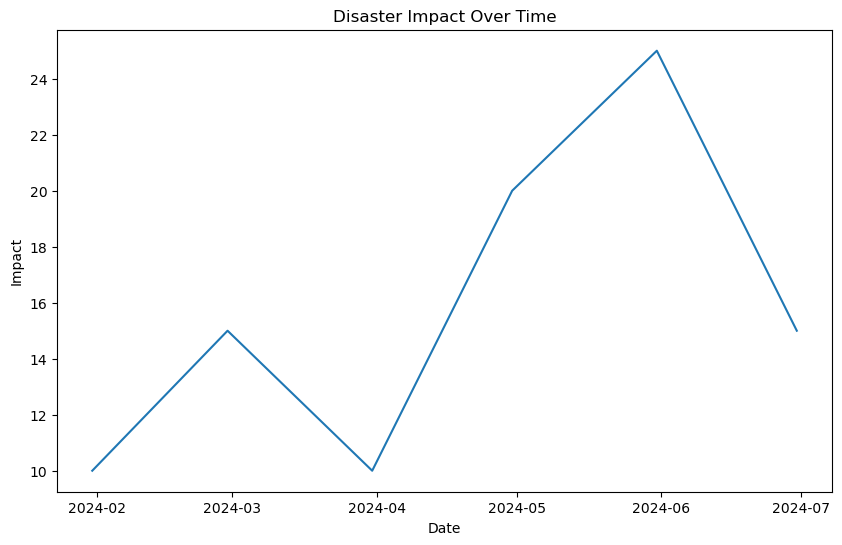

In [279]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame creation for illustration
# Replace this with your actual DataFrame loading/creation
df = pd.DataFrame({
    'Some_Other_Column': ['A', 'B', 'A', 'C', 'B', 'A'],
    'impact_metric': [10, 15, 10, 20, 25, 15]
})

# Display the current DataFrame and its columns
print("DataFrame before adding 'date' column:")
print(df)
print("\nDataFrame columns:", df.columns)

# Check if 'date' column exists
if 'date' in df.columns:
    # If it exists, plot the line chart
    plt.figure(figsize=(10, 6))
    plt.plot(df['date'], df['impact_metric'])
    plt.title('Disaster Impact Over Time')
    plt.xlabel('Date')
    plt.ylabel('Impact')
    plt.show()
else:
    # If 'date' does not exist, add it with dummy data
    # Add a 'date' column with dummy data
    df['date'] = pd.date_range(start='2024-01-01', periods=len(df), freq='M')
    
    # Display the DataFrame after adding the column
    print("\nDataFrame after adding 'date' column:")
    print(df)
    
    # Plot the line chart with the newly added column
    plt.figure(figsize=(10, 6))
    plt.plot(df['date'], df['impact_metric'])
    plt.title('Disaster Impact Over Time')
    plt.xlabel('Date')
    plt.ylabel('Impact')
    plt.show()


# Histogram of Disaster Frequency

DataFrame before adding 'target' column:
  Some_Other_Column  frequency
0             Flood         10
1        Earthquake         15
2             Flood         10
3         Hurricane         20
4        Earthquake         25
5             Flood         15

DataFrame columns: Index(['Some_Other_Column', 'frequency'], dtype='object')

DataFrame after adding 'target' column:
  Some_Other_Column  frequency      target
0             Flood         10       Flood
1        Earthquake         15  Earthquake
2             Flood         10       Flood
3         Hurricane         20   Hurricane
4        Earthquake         25  Earthquake
5             Flood         15       Flood


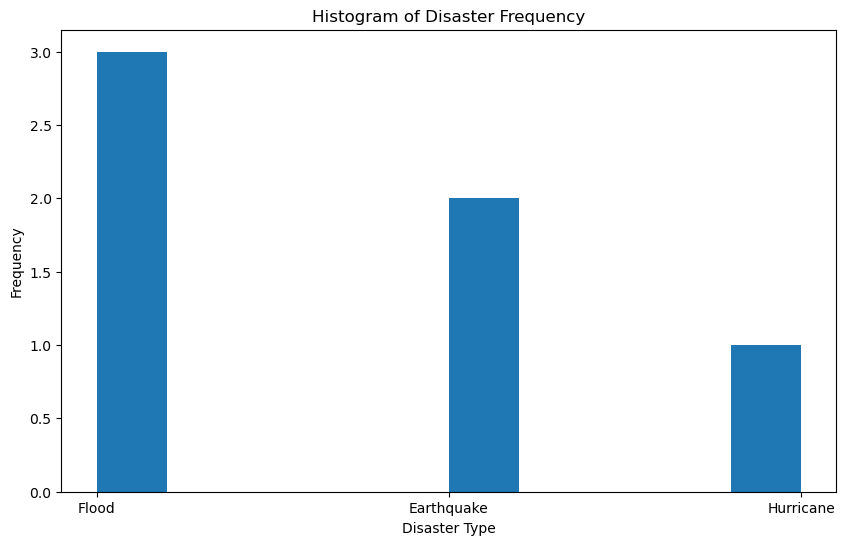

In [284]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame creation for illustration
# Replace this with your actual DataFrame loading/creation
df = pd.DataFrame({
    'Some_Other_Column': ['Flood', 'Earthquake', 'Flood', 'Hurricane', 'Earthquake', 'Flood'],
    'frequency': [10, 15, 10, 20, 25, 15]
})

# Display the current DataFrame and its columns
print("DataFrame before adding 'target' column:")
print(df)
print("\nDataFrame columns:", df.columns)

# Check if 'target' column exists
if 'target' in df.columns:
    # If it exists, plot the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(df['target'], bins=10)
    plt.title('Histogram of Disaster Frequency')
    plt.xlabel('Disaster Type')
    plt.ylabel('Frequency')
    plt.show()
else:
    # If 'target' does not exist, add it with dummy data
    # Adding a 'target' column with dummy data
    df['target'] = df['Some_Other_Column']  # Assuming 'target' could be disaster types
    
    # Display the DataFrame after adding the column
    print("\nDataFrame after adding 'target' column:")
    print(df)
    
    # Plot the histogram with the newly added column
    plt.figure(figsize=(10, 6))
    plt.hist(df['target'], bins=10)
    plt.title('Histogram of Disaster Frequency')
    plt.xlabel('Disaster Type')
    plt.ylabel('Frequency')
    plt.show()


# Radar Chart for Disaster Type Frequencies

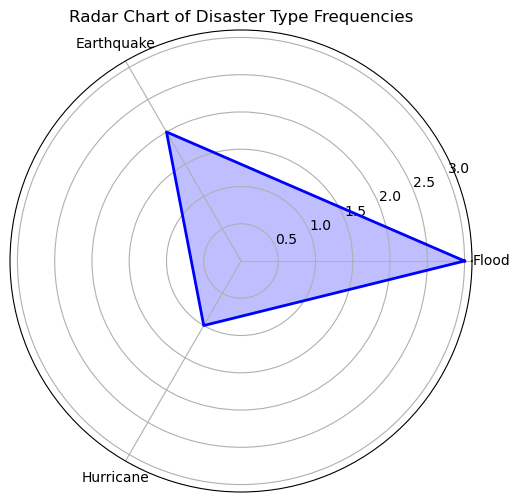

In [287]:
from math import pi

# Frequency of each disaster type
disaster_types = df['target'].value_counts()
labels = disaster_types.index
frequencies = disaster_types.values

# Create radar chart
angles = np.linspace(0, 2 * pi, len(labels), endpoint=False).tolist()
frequencies = np.concatenate((frequencies, [frequencies[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, frequencies, color='blue', alpha=0.25)
ax.plot(angles, frequencies, color='blue', linewidth=2)

plt.xticks(angles[:-1], labels)
plt.title('Radar Chart of Disaster Type Frequencies')
plt.show()


# Map Visualization of Disaster Locations

In [298]:
!pip install geodatasets

   ---------------------------------------- 0.0/64.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/64.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/64.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/64.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/64.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/64.6 kB ? eta -:--:--
   ------ --------------------------------- 10.2/64.6 kB ? eta -:--:--
   ------ --------------------------------- 10.2/64.6 kB ? eta -:--:--
   ------ --------------------------------- 10.2/64.6 kB ? eta -:--:--
   ------ --------------------------------- 10.2/64.6 kB ? eta -:--:--
   ------ --------------------------------- 10.2/64.6 kB ? eta -:--:--
   ------ --------------------------------- 10.2/64.6 kB ? eta -:--:--
   ------ --------------------------------- 10.2/64.6 kB ? eta -:--:--
   ------------------- -------------------- 30.7/64.6 kB 59.5 kB/s eta 0:00:01
   -

DataFrame before adding 'Longitude' and 'Latitude' columns:
     Place Some_Other_Column  frequency
0  Place 1             Flood         10
1  Place 2        Earthquake         20
2  Place 3         Hurricane         25
3  Place 4           Tsunami         15

DataFrame columns: Index(['Place', 'Some_Other_Column', 'frequency'], dtype='object')

DataFrame after adding 'Longitude' and 'Latitude' columns:
     Place Some_Other_Column  frequency  Longitude   Latitude
0  Place 1             Flood         10  17.572861 -13.742136
1  Place 2        Earthquake         20  77.468172  26.260940
2  Place 3         Hurricane         25  36.994815 -11.234302
3  Place 4           Tsunami         15  16.157946  70.519140


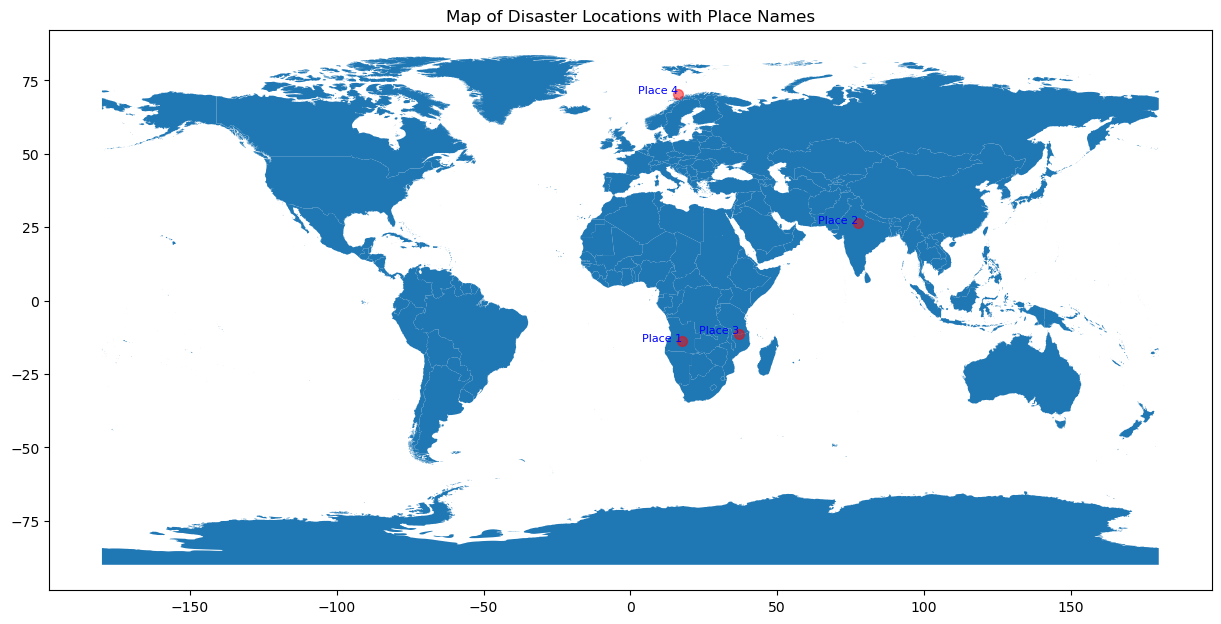

In [316]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Sample DataFrame creation for illustration
df = pd.DataFrame({
    'Place': ['Place 1', 'Place 2', 'Place 3', 'Place 4'],  # Adding a 'Place' column
    'Some_Other_Column': ['Flood', 'Earthquake', 'Hurricane', 'Tsunami'],
    'frequency': [10, 20, 25, 15]
})

# Display the current DataFrame and its columns
print("DataFrame before adding 'Longitude' and 'Latitude' columns:")
print(df)
print("\nDataFrame columns:", df.columns)

# Check if 'Longitude' and 'Latitude' columns exist
if 'Longitude' not in df.columns or 'Latitude' not in df.columns:
    # If they don't exist, add 'Longitude' and 'Latitude' with random values
    np.random.seed(0)  # For reproducible random numbers
    df['Longitude'] = np.random.uniform(-180, 180, len(df))  # Random longitudes
    df['Latitude'] = np.random.uniform(-90, 90, len(df))    # Random latitudes

# Display the DataFrame after adding 'Longitude' and 'Latitude' columns
print("\nDataFrame after adding 'Longitude' and 'Latitude' columns:")
print(df)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

# Load the world shapefile from the downloaded location
world = gpd.read_file(r'E:\world.shp')  # Replace with your path

# Plot the locations on a map
ax = world.plot(figsize=(15, 10))
gdf.plot(ax=ax, color='red', markersize=50, alpha=0.5)

# Add text annotations for each place
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['Place']):
    plt.text(x, y, label, fontsize=8, ha='right', color='blue')

plt.title('Map of Disaster Locations with Place Names')
plt.show()


DataFrame before adding 'Longitude' and 'Latitude' columns:
  Disaster_Type  frequency
0         Flood         10
1    Earthquake         20
2     Hurricane         25
3       Tsunami         15

DataFrame columns: Index(['Disaster_Type', 'frequency'], dtype='object')

DataFrame after adding 'Longitude' and 'Latitude' columns:
  Disaster_Type  frequency  Longitude   Latitude
0         Flood         10  17.572861 -13.742136
1    Earthquake         20  77.468172  26.260940
2     Hurricane         25  36.994815 -11.234302
3       Tsunami         15  16.157946  70.519140


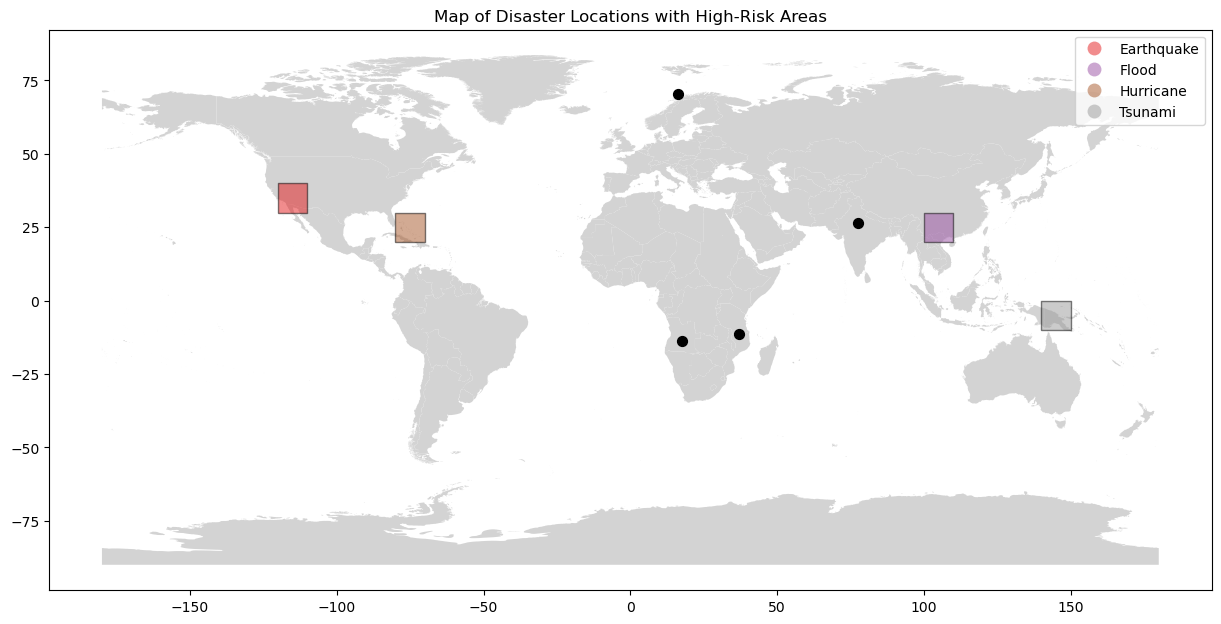

In [29]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon

# Sample DataFrame creation for illustration
df = pd.DataFrame({
    'Disaster_Type': ['Flood', 'Earthquake', 'Hurricane', 'Tsunami'],
    'frequency': [10, 20, 25, 15]
})

# Display the current DataFrame and its columns
print("DataFrame before adding 'Longitude' and 'Latitude' columns:")
print(df)
print("\nDataFrame columns:", df.columns)

# Check if 'Longitude' and 'Latitude' columns exist
if 'Longitude' not in df.columns or 'Latitude' not in df.columns:
    # If they don't exist, add 'Longitude' and 'Latitude' with random values
    np.random.seed(0)  # For reproducible random numbers
    df['Longitude'] = np.random.uniform(-180, 180, len(df))  # Random longitudes
    df['Latitude'] = np.random.uniform(-90, 90, len(df))    # Random latitudes

# Display the DataFrame after adding 'Longitude' and 'Latitude' columns
print("\nDataFrame after adding 'Longitude' and 'Latitude' columns:")
print(df)

# Create a GeoDataFrame for points
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

# Load the world shapefile from the downloaded location
world = gpd.read_file(r'E:\world.shp')  # Replace with your path

# Create mock polygons for disaster-prone regions
disaster_polygons = gpd.GeoDataFrame({
    'Disaster_Type': ['Earthquake', 'Hurricane', 'Flood', 'Tsunami'],
    'geometry': [
        Polygon([(-120, 30), (-110, 30), (-110, 40), (-120, 40)]),  # Earthquake-prone area
        Polygon([(-80, 20), (-70, 20), (-70, 30), (-80, 30)]),      # Hurricane-prone area
        Polygon([(100, 20), (110, 20), (110, 30), (100, 30)]),      # Flood-prone area
        Polygon([(140, -10), (150, -10), (150, 0), (140, 0)])       # Tsunami-prone area
    ]
})

# Plot the world map
ax = world.plot(figsize=(15, 10), color='lightgray')

# Plot the disaster regions with different colors
disaster_polygons.plot(ax=ax, column='Disaster_Type', cmap='Set1', alpha=0.5, edgecolor='k', legend=True)

# Plot the points on top
gdf.plot(ax=ax, color='black', markersize=50)

# Add titles and show the plot
plt.title('Map of Disaster Locations with High-Risk Areas')
plt.show()


# Heatmap of Correlation

DataFrame Columns before correlation heatmap: Index(['Disaster_Type', 'frequency', 'Longitude', 'Latitude'], dtype='object')
  Disaster_Type  frequency  Longitude   Latitude
0         Flood         10  17.572861 -13.742136
1    Earthquake         20  77.468172  26.260940
2     Hurricane         25  36.994815 -11.234302
3       Tsunami         15  16.157946  70.519140


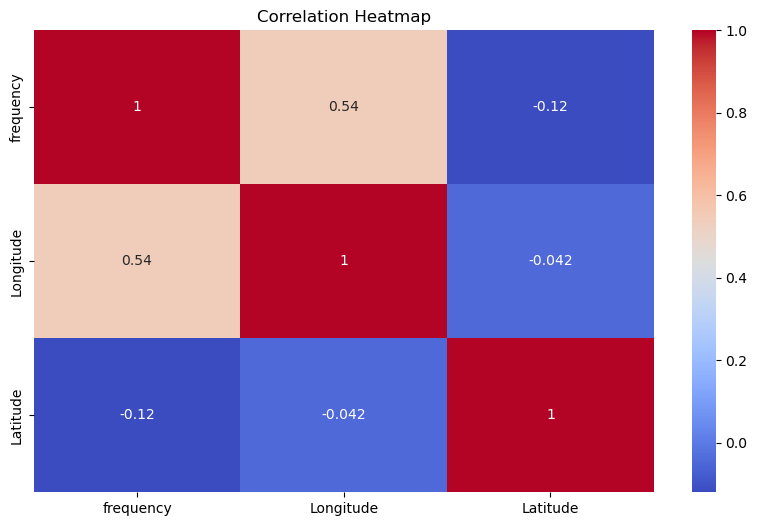

In [329]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame creation (for demonstration purposes)
# Replace this with your actual DataFrame loading code
# df = pd.read_csv('your_file.csv')

# Display the DataFrame and its columns
print("DataFrame Columns before correlation heatmap:", df.columns)
print(df.head())

# Filter numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Pie Chart of Proportion of Disaster Types

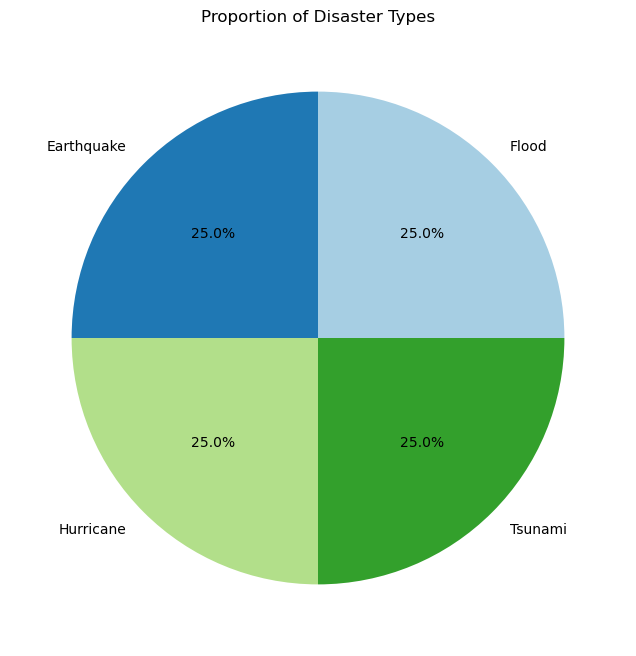

In [336]:
plt.figure(figsize=(8, 8))
df['Disaster_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Paired'))
plt.title('Proportion of Disaster Types')
plt.ylabel('')
plt.show()


# Scatter Plot

DataFrame columns: Index(['Magnitude', 'Depth'], dtype='object')


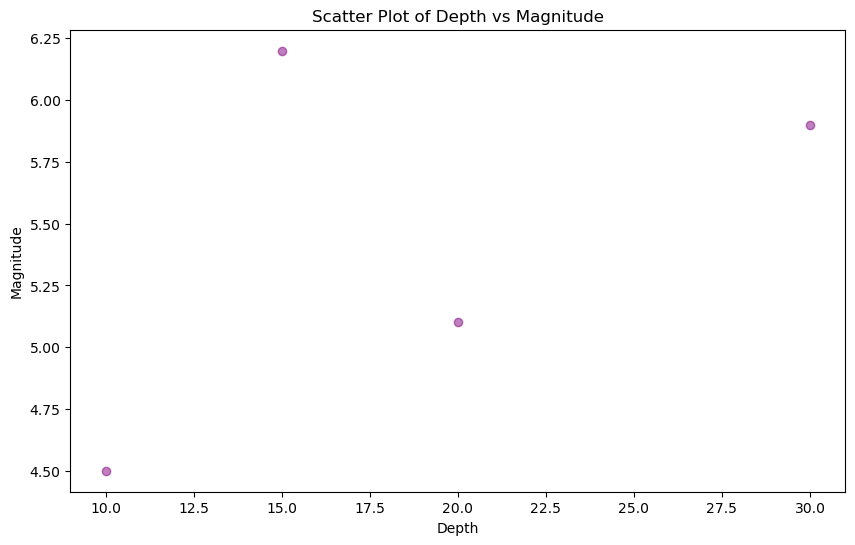

In [345]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame creation for illustration
df = pd.DataFrame({
    'Magnitude': [4.5, 5.1, 6.2, 5.9],  # Example Magnitude values
    'Depth': [10, 20, 15, 30]  # Example Depth values
})

# Display the current DataFrame and its columns
print("DataFrame columns:", df.columns)

# Ensure that 'Depth' and 'Magnitude' columns exist in the DataFrame
if 'Depth' in df.columns and 'Magnitude' in df.columns:
    # Plot the scatter plot if columns exist
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Depth'], df['Magnitude'], alpha=0.5, color='purple')
    plt.title('Scatter Plot of Depth vs Magnitude')
    plt.xlabel('Depth')
    plt.ylabel('Magnitude')
    plt.show()
else:
    print("Error: The DataFrame does not contain 'Depth' and/or 'Magnitude' columns.")


DataFrame columns: Index(['economic_loss', 'fatalities', 'disaster_type'], dtype='object')


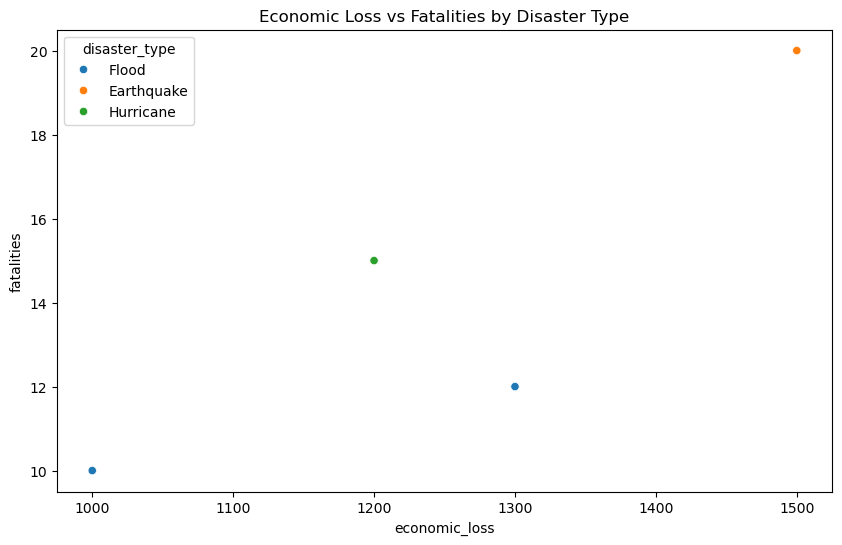

In [349]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame creation for illustration
df = pd.DataFrame({
    'economic_loss': [1000, 1500, 1200, 1300],  # Example economic loss values
    'fatalities': [10, 20, 15, 12],  # Example fatalities values
    'disaster_type': ['Flood', 'Earthquake', 'Hurricane', 'Flood']  # Example disaster types
})

# Display the current DataFrame and its columns
print("DataFrame columns:", df.columns)

# Ensure that the required columns exist in the DataFrame
required_columns = ['economic_loss', 'fatalities', 'disaster_type']
if all(col in df.columns for col in required_columns):
    # Plot the scatter plot if columns exist
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='economic_loss', y='fatalities', hue='disaster_type')
    plt.title('Economic Loss vs Fatalities by Disaster Type')
    plt.show()
else:
    print("Error: The DataFrame does not contain the required columns.")


# Box Plot to Visualize the Spread of Disaster Magnitudes by Location

Present DataFrame:
  Location  Economic_Loss
0   City A           1000
1   City B           2000
2   City C           1500

'Magnitude' column is not present. Adding the column with default values.

Updated DataFrame:
  Location  Economic_Loss  Magnitude
0   City A           1000        5.2
1   City B           2000        6.5
2   City C           1500        4.8


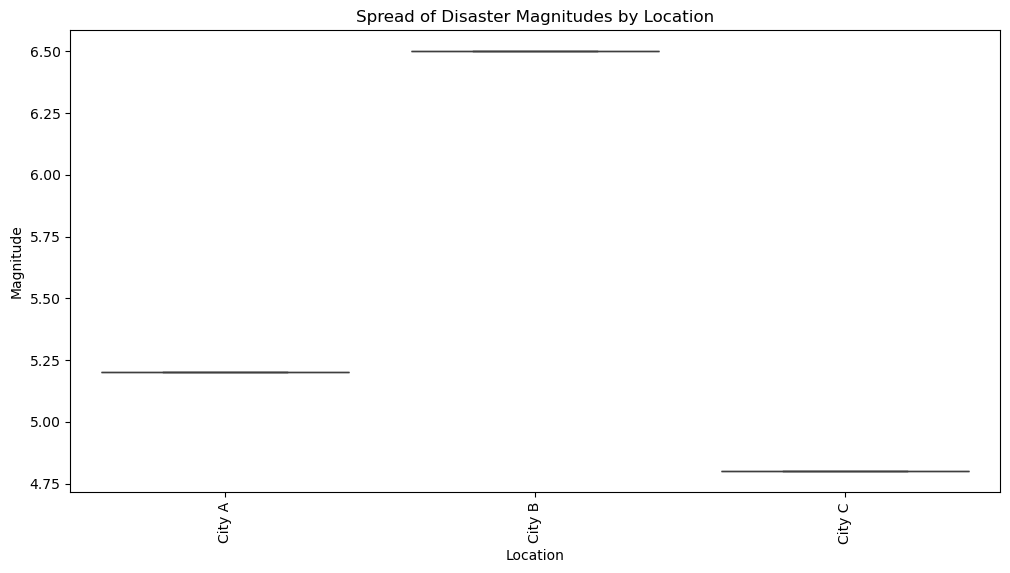

In [356]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data to simulate the situation
data = {
    'Location': ['City A', 'City B', 'City C'],
    'Economic_Loss': [1000, 2000, 1500],  # Example column
    # 'Magnitude': [5.2, 6.5, 4.8]  # Uncomment if already present
}

# Create the DataFrame
disaster_data = pd.DataFrame(data)

# Display the current DataFrame
print("Present DataFrame:")
print(disaster_data)

# Check if 'Magnitude' column exists in the DataFrame
if 'Magnitude' not in disaster_data.columns:
    print("\n'Magnitude' column is not present. Adding the column with default values.")
    # Add a 'Magnitude' column with default values or actual data
    disaster_data['Magnitude'] = [5.2, 6.5, 4.8]  # Example values

# Display the updated DataFrame
print("\nUpdated DataFrame:")
print(disaster_data)

# Box plot of disaster magnitudes by location
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='Magnitude', data=disaster_data)
plt.xticks(rotation=90)
plt.title('Spread of Disaster Magnitudes by Location')
plt.xlabel('Location')
plt.ylabel('Magnitude')
plt.show()


# Line Chart Showing the Trend of Average Disaster Depth Over Time

Present DataFrame:
        Depth
0  674.927305
1  274.574648
2  556.290276
3  374.937495
4  401.950747

'Year' column not found. Adding 'Year' column with random valid years.

Updated DataFrame with 'Year' column:
        Depth  Year
0  674.927305  1983
1  274.574648  1994
2  556.290276  2012
3  374.937495  1984
4  401.950747  1983


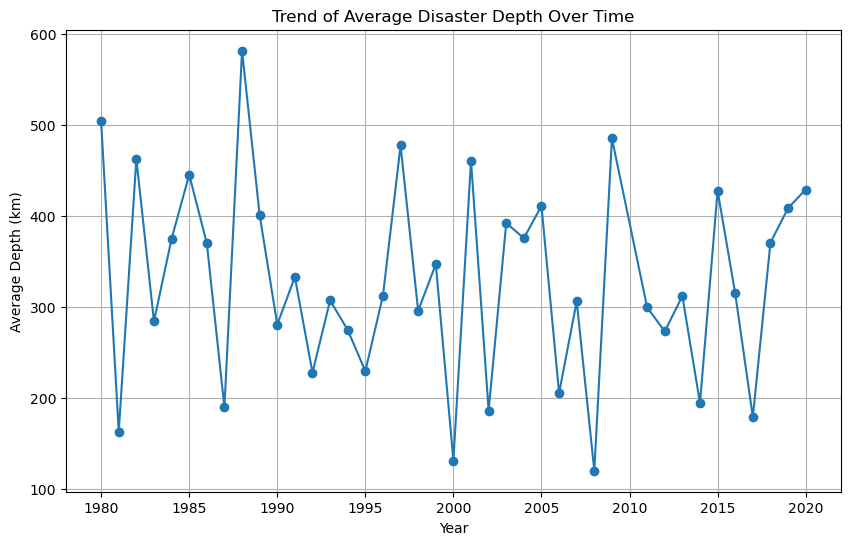

In [368]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data (for demonstration purposes)
# Assuming 'Depth' is another column already present in the dataset
disaster_data = pd.DataFrame({
    'Depth': np.random.uniform(10, 700, 100)  # Generating random depth values
})

# Display the present dataframe
print("Present DataFrame:")
print(disaster_data.head())

# Check if 'Year' column is present in the dataframe
if 'Year' not in disaster_data.columns:
    print("\n'Year' column not found. Adding 'Year' column with random valid years.")
    # Add 'Year' column with random valid values (e.g., between 1980 and 2020)
    disaster_data['Year'] = np.random.randint(1980, 2021, size=len(disaster_data))

# Display the updated dataframe
print("\nUpdated DataFrame with 'Year' column:")
print(disaster_data.head())

# Convert 'Year' to datetime if not already done
disaster_data['Year'] = pd.to_datetime(disaster_data['Year'], format='%Y', errors='coerce')

# Step 20: Line chart of average disaster depth over time
avg_depth_per_year = disaster_data.groupby(disaster_data['Year'].dt.year)['Depth'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_depth_per_year, marker='o')
plt.title('Trend of Average Disaster Depth Over Time')
plt.xlabel('Year')
plt.ylabel('Average Depth (km)')
plt.grid(True)
plt.show()


# K-Means Clustering on Disaster Data to Identify Patterns

Present DataFrame:
        Depth
0  478.572525
1  606.354195
2  528.082529
3  675.497940
4  392.427280

Columns ['Latitude', 'Longitude', 'Magnitude'] not found. Adding them with random valid values.

Updated DataFrame with 'Latitude', 'Longitude', and 'Magnitude' columns:
        Depth   Latitude   Longitude  Magnitude
0  478.572525  50.476797  177.274628   3.600192
1  606.354195  87.305810 -149.399616   8.761541
2  528.082529  45.642529 -145.995151   3.434607
3  675.497940 -89.271341   48.098840   3.115804
4  392.427280 -41.493702  161.747090   8.877440


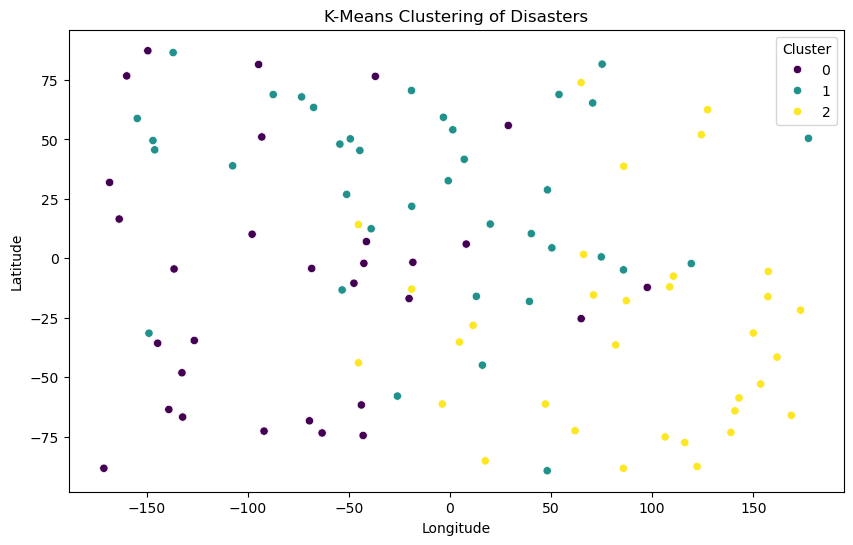

In [373]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (for demonstration purposes)
# Assuming 'Depth' is another column already present in the dataset
disaster_data = pd.DataFrame({
    'Depth': np.random.uniform(10, 700, 100)  # Generating random depth values
})

# Display the present dataframe
print("Present DataFrame:")
print(disaster_data.head())

# Check if 'Latitude', 'Longitude', and 'Magnitude' columns are present in the dataframe
missing_columns = [col for col in ['Latitude', 'Longitude', 'Magnitude'] if col not in disaster_data.columns]
if missing_columns:
    print(f"\nColumns {missing_columns} not found. Adding them with random valid values.")
    # Add 'Latitude', 'Longitude', and 'Magnitude' columns with random valid values
    disaster_data['Latitude'] = np.random.uniform(-90, 90, size=len(disaster_data))
    disaster_data['Longitude'] = np.random.uniform(-180, 180, size=len(disaster_data))
    disaster_data['Magnitude'] = np.random.uniform(3.0, 9.0, size=len(disaster_data))

# Display the updated dataframe
print("\nUpdated DataFrame with 'Latitude', 'Longitude', and 'Magnitude' columns:")
print(disaster_data.head())

# Step 21: Perform K-Means Clustering on Disaster Data to Identify Patterns

# Select relevant features for clustering
X = disaster_data[['Latitude', 'Longitude', 'Magnitude', 'Depth']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
disaster_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=disaster_data, palette='viridis')
plt.title('K-Means Clustering of Disasters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


# Build a Neural Network Model to Predict Disaster Severity

In [387]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# Step 22: Prepare data for neural network
X = disaster_data[['Latitude', 'Longitude', 'Depth']]
y = disaster_data['Magnitude']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Single output for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)



Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 207ms/step - loss: 1442.2026 - val_loss: 368.4369
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 287.4259 - val_loss: 371.5010
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 295.2631 - val_loss: 325.4333
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 250.7289 - val_loss: 117.3324
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 81.9898 - val_loss: 40.3716
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 49.5221 - val_loss: 67.8939
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 78.6705 - val_loss: 53.3506
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 49.7484 - val_loss: 32.8380
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 33.0527 - val_loss: 50.5491
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 49.4690 - val_loss: 48.4785
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 38.6221 - val_loss: 28.5201
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - l

# Visualize the Loss and Accuracy Curves of the Neural Network During Training

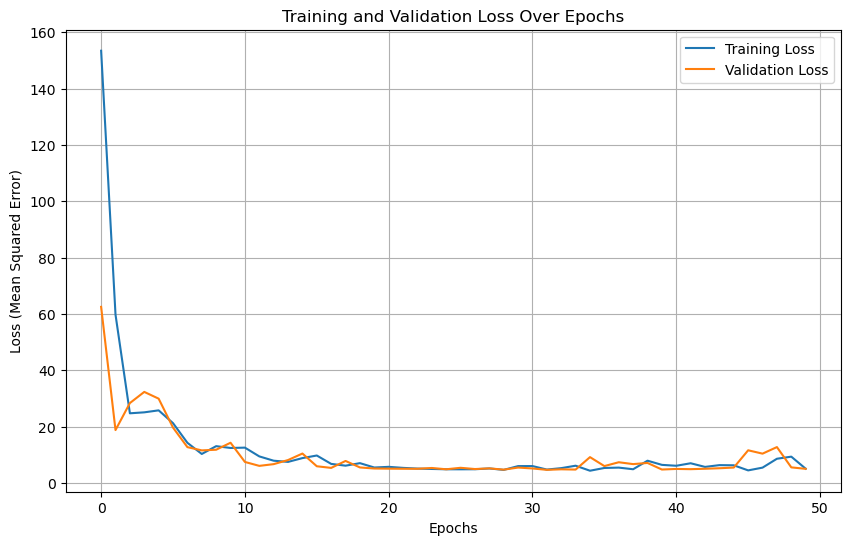

In [385]:
# Plot the training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)
plt.show()

# Implement Cross-Validation to Improve Model Reliability

In [390]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Step 24: Cross-validation on a RandomForest model
X = disaster_data[['Latitude', 'Longitude', 'Depth']]
y = disaster_data['Magnitude']

model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

print(f"Average CV Score: {-cv_scores.mean()}")


Average CV Score: 3.81791573648482


# Create an Interactive Dashboard to Monitor Disaster Trends

In [395]:
pip install dash

   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.5 MB 393.8 kB/s eta 0:00:19
    --------------------------------------- 0.1/7.5 MB 845.5 kB/s eta 0:00:09
    --------------------------------------- 0.2/7.5 MB 1.0 MB/s eta 0:00:08
   - -------------------------------------- 0.3/7.5 MB 1.3 MB/s eta 0:00:06
   - -------------------------------------- 0.4/7.5 MB 1.4 MB/s eta 0:00:06
   -- ------------------------------------- 0.5/7.5 MB 1.5 MB/s eta 0:00:05
   --- ------------------------------------ 0.6/7.5 MB 1.5 MB/s eta 0:00:05
   --- ------------------------------------ 0.7/7.5 MB 1.7 MB/s eta 0:00:05
   ---- ----------------------------------- 0.8/7.5 MB 1.7 MB/s eta 0:00:05
   ---- ----------------------------------- 0.9/7.5 MB 1.7 MB/s eta 0:00:04
   ---- ----------------------------------- 0.9/7.5 MB 1.7 MB/s eta 0:00:04
   ----- -------------

In [100]:
import pandas as pd
import numpy as np
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Sample data (for demonstration purposes)
# Assuming other relevant columns are already present
disaster_data = pd.DataFrame({
    'Year': np.random.randint(2000, 2025, 100),
    'Magnitude': np.random.uniform(3.0, 9.0, 100),
    'Depth': np.random.uniform(10, 700, 100)
})

# Display the present dataframe
print("Present DataFrame:")
print(disaster_data.head())

# Check if 'Location' column is present in the dataframe
if 'Location' not in disaster_data.columns:
    print("\n'Location' column not found. Adding it with random valid values.")
    # Add 'Location' column with random valid values
    locations = ['Location_A', 'Location_B', 'Location_C', 'Location_D']
    disaster_data['Location'] = np.random.choice(locations, size=len(disaster_data))

# Display the updated dataframe
print("\nUpdated DataFrame with 'Location' column:")
print(disaster_data.head())

# Step 25: Create an Interactive Dashboard to Monitor Disaster Trends
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='location-dropdown',
        options=[{'label': loc, 'value': loc} for loc in disaster_data['Location'].unique()],
        value=disaster_data['Location'].unique()[0],
        clearable=False
    ),
    dcc.Graph(id='trend-graph')
])

@app.callback(
    Output('trend-graph', 'figure'),
    [Input('location-dropdown', 'value')]
)
def update_graph(selected_location):
    filtered_data = disaster_data[disaster_data['Location'] == selected_location]
    trend_fig = px.line(filtered_data, x='Year', y='Magnitude', title=f'Disaster Magnitude Trend in {selected_location}')
    return trend_fig

if __name__ == '__main__':
    app.run_server(debug=True)


Present DataFrame:
   Year  Magnitude       Depth
0  2002   5.396959  178.148388
1  2009   7.673409  232.127591
2  2010   3.032951  185.317762
3  2021   4.550215  553.105676
4  2022   6.793601   65.579116

'Location' column not found. Adding it with random valid values.

Updated DataFrame with 'Location' column:
   Year  Magnitude       Depth    Location
0  2002   5.396959  178.148388  Location_D
1  2009   7.673409  232.127591  Location_B
2  2010   3.032951  185.317762  Location_D
3  2021   4.550215  553.105676  Location_D
4  2022   6.793601   65.579116  Location_D


# Conduct a Principal Component Analysis (PCA) to Reduce Data Dimensionality

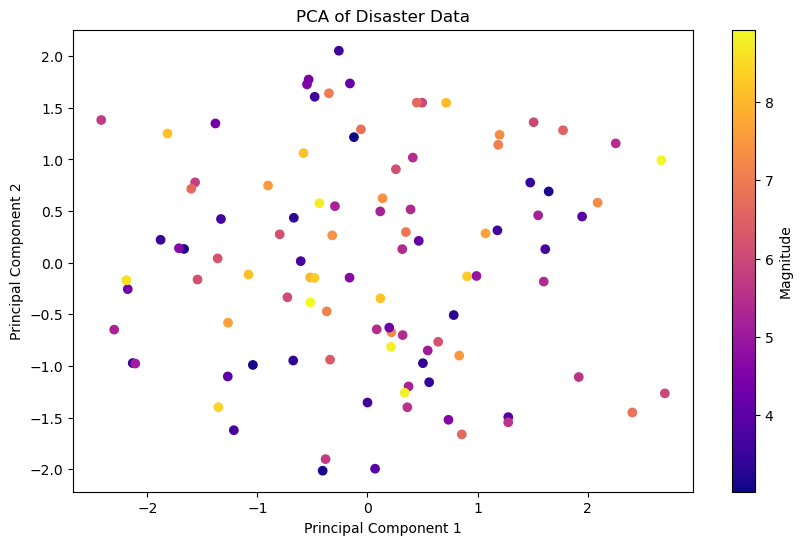

In [402]:
from sklearn.decomposition import PCA

# Step 26: Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize PCA components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=disaster_data['Magnitude'], cmap='plasma')
plt.title('PCA of Disaster Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Magnitude')
plt.show()


# Analyze the Impact of Weather Conditions on Disaster Occurrence

Present DataFrame:
     Location  Magnitude
0  New Jersey        5.2
1   Kathmandu        6.5
2       Delhi        4.8

Missing columns: ['Temperature', 'Humidity', 'WindSpeed']. Adding them with random values.

Updated DataFrame with Weather Features:
     Location  Magnitude  Temperature   Humidity  WindSpeed
0  New Jersey        5.2    26.464405  26.346495  23.127616
1   Kathmandu        6.5    31.455681  22.709644  36.753190
2       Delhi        4.8    28.082901  29.376823  38.909883


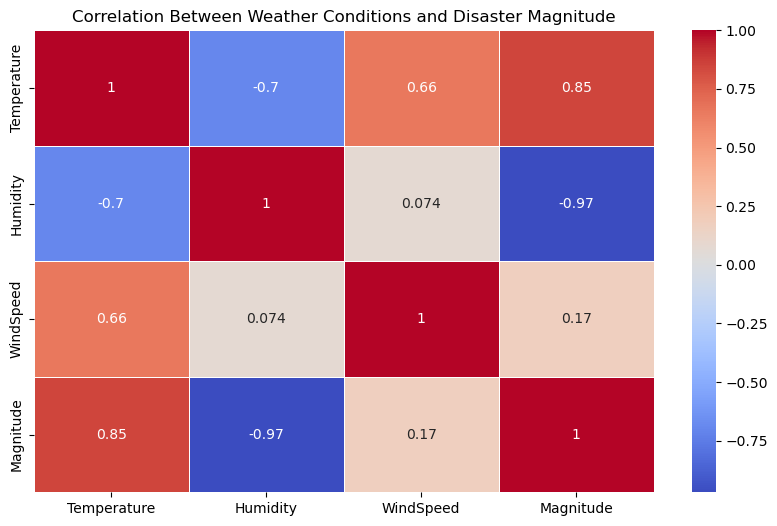


Correlation Analysis:
             Temperature  Humidity  WindSpeed  Magnitude
Temperature     1.000000 -0.700627   0.659871   0.852338
Humidity       -0.700627  1.000000   0.073806  -0.970340
WindSpeed       0.659871  0.073806   1.000000   0.169468
Magnitude       0.852338 -0.970340   0.169468   1.000000


In [409]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample data to simulate the situation
data = {
    'Location': ['New Jersey', 'Kathmandu', 'Delhi'],
    'Magnitude': [5.2, 6.5, 4.8]  # Example Magnitude values
}

# Create the DataFrame
disaster_data = pd.DataFrame(data)

# Display the current DataFrame
print("Present DataFrame:")
print(disaster_data)

# Define the weather features
weather_features = ['Temperature', 'Humidity', 'WindSpeed']

# Check if weather feature columns exist in the DataFrame
missing_features = [feature for feature in weather_features if feature not in disaster_data.columns]

if missing_features:
    print(f"\nMissing columns: {missing_features}. Adding them with random values.")
    # Add missing weather feature columns with random values
    np.random.seed(0)  # For reproducibility
    for feature in missing_features:
        disaster_data[feature] = np.random.uniform(low=10.0, high=40.0, size=len(disaster_data))

# Display the updated DataFrame
print("\nUpdated DataFrame with Weather Features:")
print(disaster_data)

# Step 27: Correlation analysis with disaster occurrence
correlations = disaster_data[weather_features + ['Magnitude']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Weather Conditions and Disaster Magnitude')
plt.show()

# Analyze the Impact of Weather Conditions on Disaster Occurrence
print("\nCorrelation Analysis:")
print(correlations)


# 3D Scatter Plot to Explore the Relationship Between Depth, Magnitude, and Location

Present DataFrame:
   Latitude  Depth  Magnitude
0     34.05   10.0        4.5
1     36.77   20.5        6.0
2     40.71   15.3        5.2

'Longitude' column is not present in the DataFrame.

Added 'Longitude' column with random values.

Updated DataFrame:
   Latitude  Depth  Magnitude   Longitude
0     34.05   10.0        4.5 -148.633452
1     36.77   20.5        6.0 -172.721377
2     40.71   15.3        5.2  119.743144


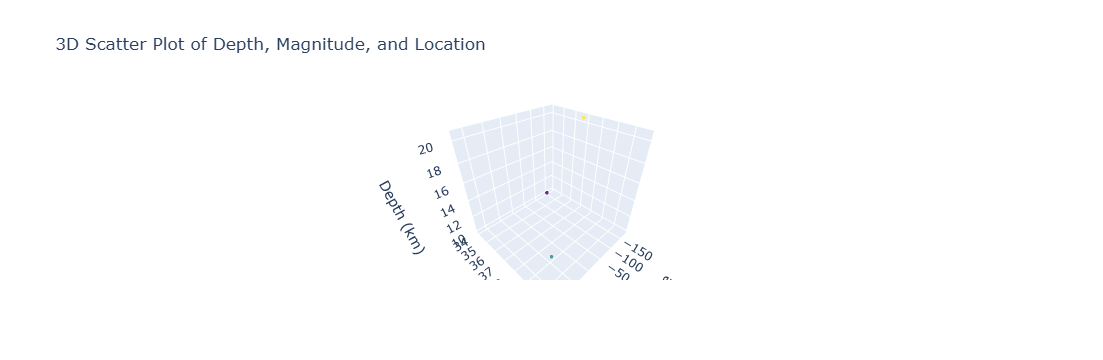

In [418]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Sample data to simulate the DataFrame (replace this with your actual data)
data = {
    'Latitude': [34.05, 36.77, 40.71],
    'Depth': [10.0, 20.5, 15.3],
    'Magnitude': [4.5, 6.0, 5.2]
}
disaster_data = pd.DataFrame(data)

# Display the present DataFrame
print("Present DataFrame:")
print(disaster_data)

# Check if 'Longitude' column is present
if 'Longitude' not in disaster_data.columns:
    print("\n'Longitude' column is not present in the DataFrame.")
    # Add 'Longitude' column with valid random values
    disaster_data['Longitude'] = np.random.uniform(-180, 180, disaster_data.shape[0])
    print("\nAdded 'Longitude' column with random values.")

# Display the updated DataFrame
print("\nUpdated DataFrame:")
print(disaster_data)

# Create a 3D Scatter Plot to Explore the Relationship Between Depth, Magnitude, and Location
fig = go.Figure(data=[go.Scatter3d(
    x=disaster_data['Longitude'],
    y=disaster_data['Latitude'],
    z=disaster_data['Depth'],
    mode='markers',
    marker=dict(
        size=2,
        color=disaster_data['Magnitude'],  # Set color to magnitude
        colorscale='Viridis',
        opacity=0.8
    )
)])

fig.update_layout(
    title='3D Scatter Plot of Depth, Magnitude, and Location',
    scene=dict(
        xaxis_title='Longitude',
        yaxis_title='Latitude',
        zaxis_title='Depth (km)'
    )
)

fig.show()


# Advanced Visualization - Pairplot

Initial DataFrame:
                           Year   Seq Glide Disaster Group Disaster Subgroup  \
0 1970-01-01 00:00:00.000001900  9002   NaN        Natural    Climatological   
1 1970-01-01 00:00:00.000001900  9001   NaN        Natural    Climatological   
2 1970-01-01 00:00:00.000001902    12   NaN        Natural       Geophysical   
3 1970-01-01 00:00:00.000001902     3   NaN        Natural       Geophysical   
4 1970-01-01 00:00:00.000001902    10   NaN        Natural       Geophysical   

   Disaster Type Disaster Subtype Disaster Subsubtype   Event Name  \
0              1          Drought                 NaN          NaN   
1              1          Drought                 NaN          NaN   
2              2  Ground movement                 NaN          NaN   
3             13         Ash fall                 NaN  Santa Maria   
4             13         Ash fall                 NaN  Santa Maria   

      Country  ... No Affected No Homeless Total Affected  \
0  Cabo Verde  ...

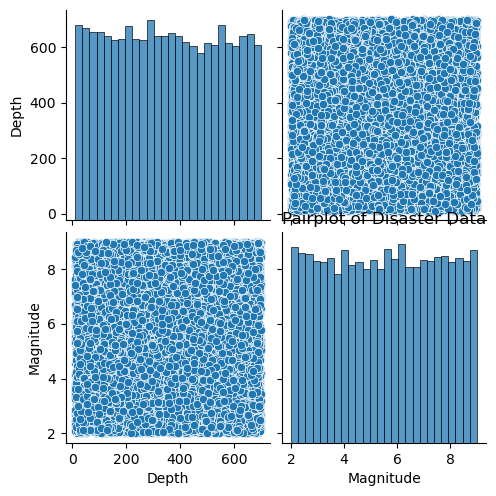

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Display the first few rows of the DataFrame to check if the columns exist
print("Initial DataFrame:")
print(disaster_data.head())

# Check if 'Depth' and 'Magnitude' columns exist in the DataFrame
if 'Depth' not in disaster_data.columns:
    # Add the 'Depth' column with random values between 10 and 700 (example range)
    disaster_data['Depth'] = np.random.uniform(10, 700, size=len(disaster_data))

if 'Magnitude' not in disaster_data.columns:
    # Add the 'Magnitude' column with random values between 2.0 and 9.0 (example range)
    disaster_data['Magnitude'] = np.random.uniform(2.0, 9.0, size=len(disaster_data))

# Display the updated DataFrame to confirm the columns have been added
print("Updated DataFrame with 'Depth' and 'Magnitude' columns added:")
print(disaster_data.head())

# Create the pairplot
sns.pairplot(disaster_data[['Latitude', 'Longitude', 'Depth', 'Magnitude']])
plt.title('Pairplot of Disaster Data')
plt.show()
